<a href="https://colab.research.google.com/github/omarcos0708/Heart_Disease_Prediction/blob/main/Heart_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SETUP

In [182]:
!pip install pandas-profiling==3.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [184]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#DATA UNDERSTANDING

- Age (age in years

- Sex (1 = male; 0 = female)

- CP (chest pain type)

- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))

- CHOL (serum cholestoral in mg/dl)

- FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- RESTECH (resting electrocardiographic results)

- THALACH (maximum heart rate achieved)

- EXANG (exercise induced angina (1 = yes; 0 = no))

- OLDPEAK (ST depression induced by exercise relative to rest)

- SLOPE (the slope of the peak exercise ST segment)

- CA (number of major vessels (0-3) colored by flourosopy)

- THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)

- TARGET (Heart Disease (1 = Yes or 0 = No)

In [4]:
df.info()
print()
print('tamanho do Data Frame (linhas, Colunas)',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

tamanho do Data Frame (linhas, Colunas) (1025, 14)


#EDA

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##Report

In [6]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#DATA PREPARATION

##TRATANDO VALORES

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.duplicated().sum()

723

In [9]:
df_clean = df.drop_duplicates()
df_clean.shape

(302, 14)

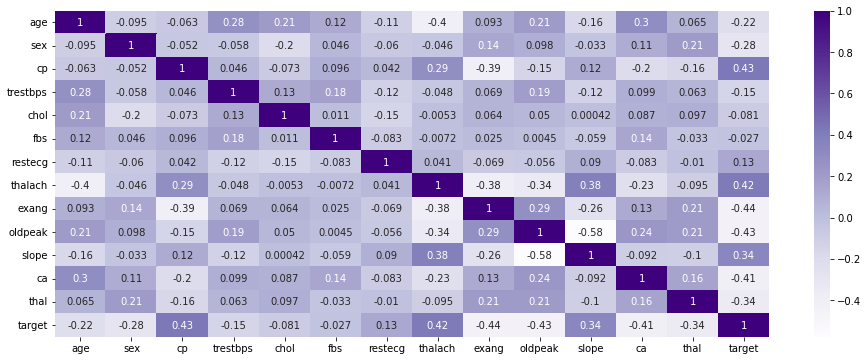

In [10]:
plt.figure(figsize = (16,6))
sns.heatmap(df_clean.corr(), annot = True, cmap = 'Purples')

In [11]:
for c in df_clean.columns:
  print(f'{c}: {df_clean[c].nunique()}')

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [12]:
categoricas = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numericas = ['age','trestbps','chol','thalach','oldpeak']

##OUTLIERS QUERY

In [125]:
df_clean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


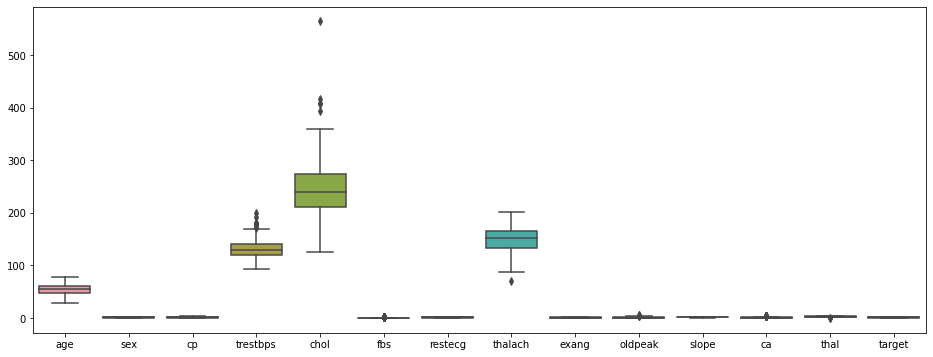

In [126]:
plt.figure(figsize = (16,6))
sns.boxplot(data = df_clean)

In [127]:
hd = df_clean.query('chol < 370')

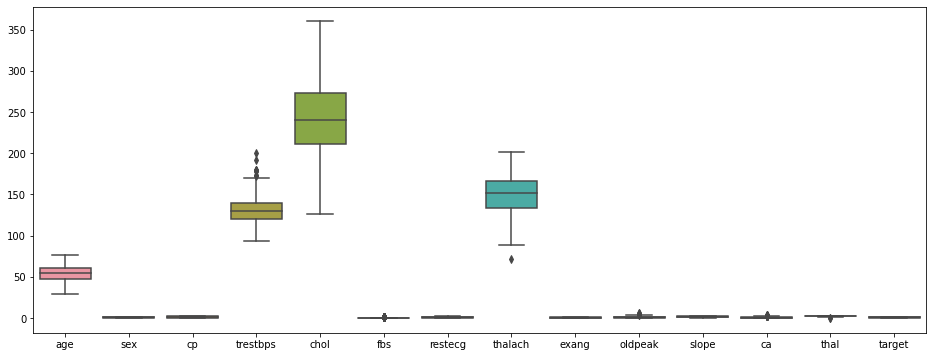

In [128]:
plt.figure(figsize = (16,6))
sns.boxplot(data =hd)

In [129]:
hd.query('trestbps > 180').sort_values('trestbps', ascending=False)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


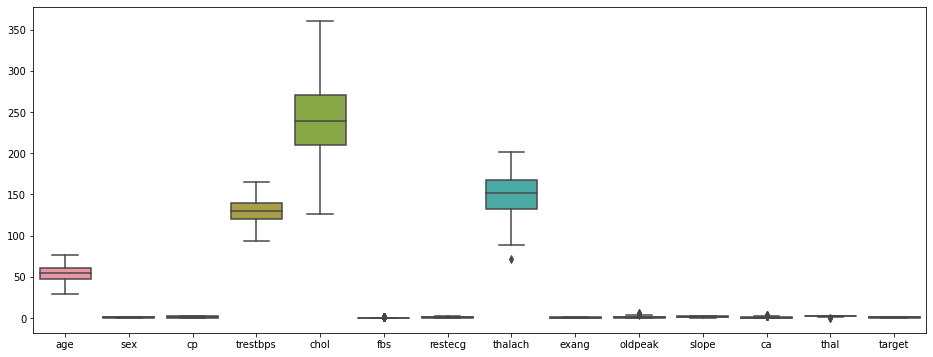

In [132]:
hd1 = hd.query('trestbps < 170')
plt.figure(figsize = (16,6))
sns.boxplot(data =hd1)

In [134]:
hd1.query('thalach < 80').sort_values('thalach', ascending=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


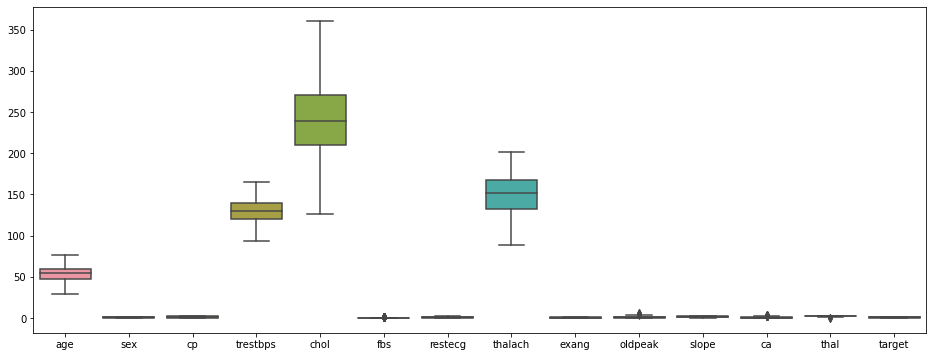

In [135]:
hd2 = hd1.query('thalach > 80')
plt.figure(figsize = (16,6))
sns.boxplot(data =hd2)

In [191]:
hd3 = pd.get_dummies(hd2, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])

#DATA VIZUALIZATION

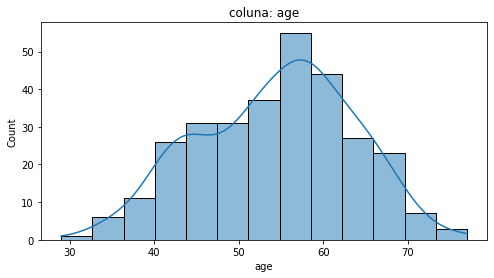

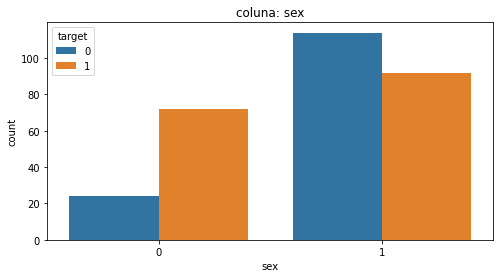

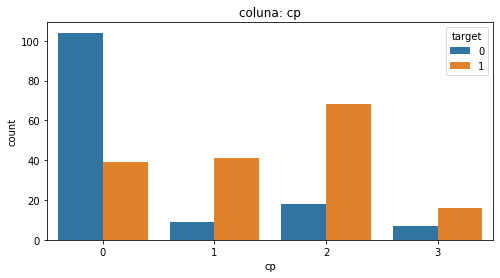

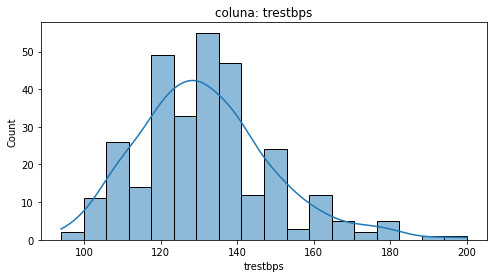

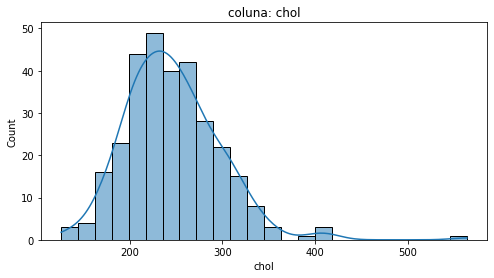

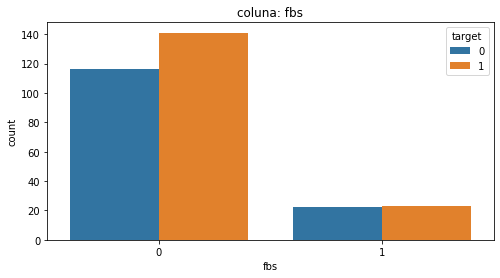

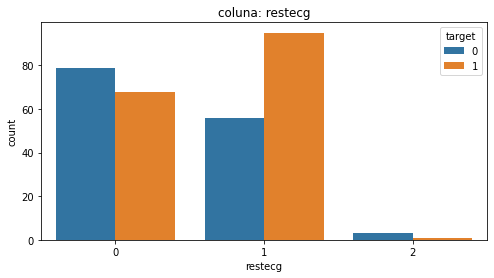

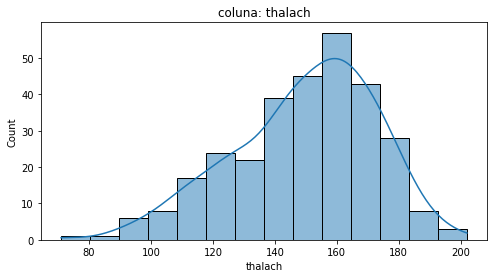

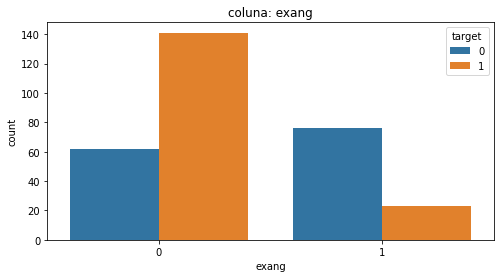

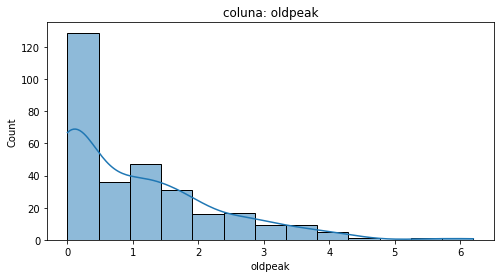

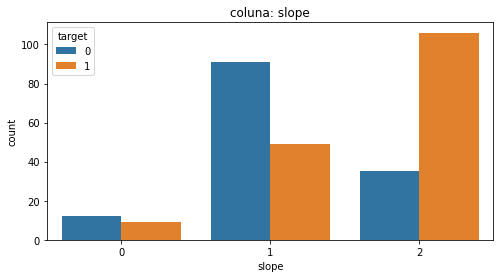

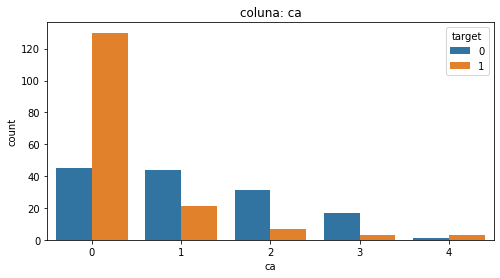

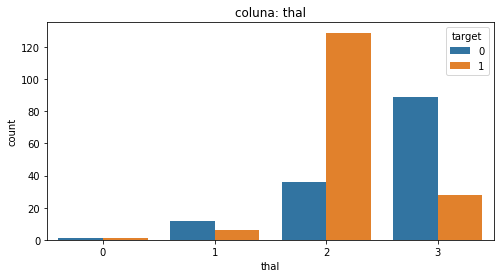

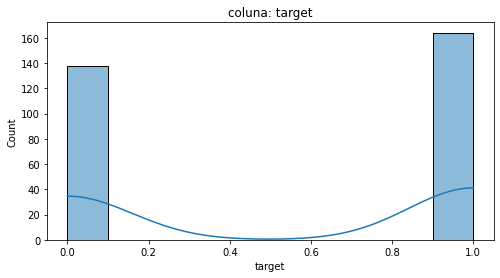

In [15]:
for c in hd2.columns:
  plt.figure(figsize = (8,4))
  plt.title(f'coluna: {c}')
  if c in categoricas:
    sns.countplot(x = hd2[c], hue = hd2['target'])
  else:
    sns.histplot(x = hd2[c], kde = True,)

#MODELING

##Model prepration

In [192]:
#df dummificado
'''
y = hd3["target"]
X = hd3.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''

In [149]:
#df tratado
'''
y = hd2["target"]
X = hd2.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''

In [212]:
#raw df

y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ML models

aqui pretendo utilizar diversos modelos de Machine Learning e comparar os seus desempenhos

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine







##Logistic Regression

In [214]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

In [215]:
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



##Naive Bayes

In [216]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

In [217]:
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[79 19]
 [11 96]]


Accuracy of Naive Bayes model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



##Random Forest Classfier

In [218]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

In [219]:
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Random Forest: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



##Extreme Gradient Boost

In [220]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

In [221]:
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 87  11]
 [  7 100]]


Accuracy of Extreme Gradient Boost: 91.21951219512195 

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        98
           1       0.90      0.93      0.92       107

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



##K-Nearest Neighbour

In [222]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

In [223]:
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



##Decision Tree

In [224]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

In [225]:
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[95  3]
 [ 8 99]]


Accuracy of DecisionTreeClassifier: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



##Support Vector Classifier

In [226]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

In [227]:
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [228]:
'''
!!! OVERFITTING !!!
'''

'\n!!! OVERFITTING !!!\n'

**fica visivel que o df inicial sem tratamento teve melhor desempenho**

#Model Evaluation

<ipython-input-249-c1b9f72643d7>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbcm')


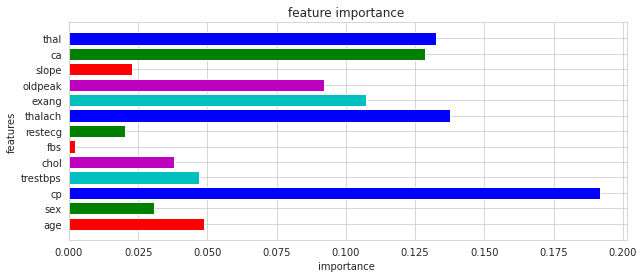

In [249]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': rf.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbcm')
plt.show()

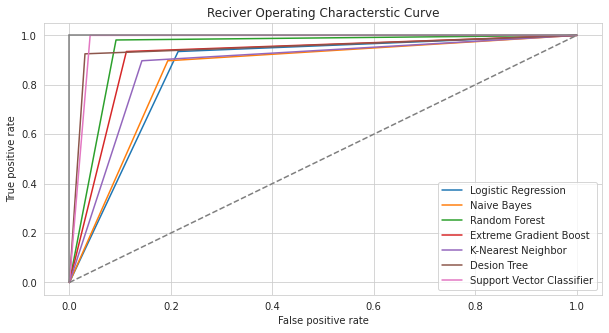

In [232]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [230]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.341463
1,Naive Bayes,85.365854
2,Random Forest,94.634146
3,Extreme Gradient Boost,91.219512
4,K-Nearest Neighbour,87.804878
5,Decision Tree,94.634146
6,Support Vector Machine,98.048780


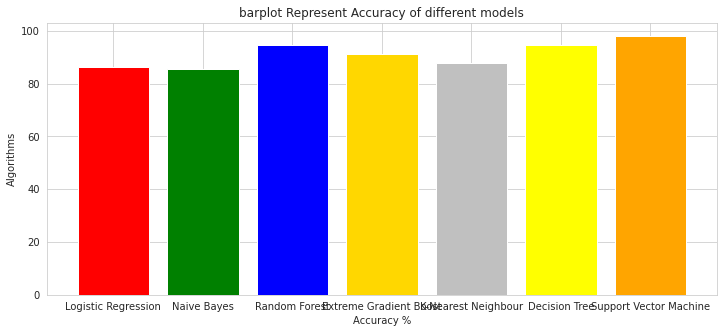

In [231]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

#Conclusion

1) Support Vector Machine obteve o melhor acerto, mas nao seria escolhido por grande risco de sobre ajuste.

2) O modelo Random Forest foi escolhido por obter alto acerto e um alto numero de Verdadeiros positivos mesmo que tenha niveis maiores de falso positivo.
- (é melhor um aviso equivocado de perigo à um perigo que não foi avisado).

3) Chest pain é o maior sintoma de cardiopatias.

4) Com o Random Forest foi possivel prever, com taxa de acerto em 94.3%, doenças cardiovasculares.